<a href="https://colab.research.google.com/github/Alena-Andriyash/ML_Pylieva_tasks/blob/main/HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E_%D0%90%D0%BD%D0%B4%D1%80%D1%96%D1%8F%D1%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls drive/MyDrive/Machine\ Learning\ для\ людей/data/linear_regression/medical-charges.csv

medical-charges.csv


In [10]:
medical_df = pd.read_csv('drive/MyDrive/Machine Learning для людей/data/linear_regression/medical-charges.csv')


In [11]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [13]:
non_smoker_df.head(10)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692
10,25,male,26.220,0,no,northeast,2721.32080


 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

# Метод найменших квадратів (Least Squares Method)

In [29]:
X = medical_df['age']
y = medical_df['charges']

In [32]:

X = non_smoker_df['age'].values
y = non_smoker_df['charges'].values


In [33]:
X, y

(array([18, 28, 33, ..., 18, 18, 21]),
 array([ 1725.5523 ,  4449.462  , 21984.47061, ...,  2205.9808 ,
         1629.8335 ,  2007.945  ]))

In [23]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [42]:
# Додаємо колонку одиничок
X_with_intercept = np.c_[np.ones(X.shape[0]), X]


X_with_intercept


array([[ 1., 18.],
       [ 1., 28.],
       [ 1., 33.],
       ...,
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 21.]])

In [35]:
# Розрахунок коефіцієнтів
MNK_coefs = normal_equations(X_with_intercept, y)
print("Коефіцієнти моделі (інтерсепт і нахил):", MNK_coefs)


Коефіцієнти моделі (інтерсепт і нахил): [-2091.42055657   267.24891283]


In [39]:
# Прогноз
predictions_1 = X_with_intercept.dot(MNK_coefs)


In [101]:
# Обчислення RMSE
rmse_1 = np.sqrt(np.mean((y - predictions_1) ** 2))
print("RMSE моделі:", rmse_1)


RMSE моделі: 4662.505766636395


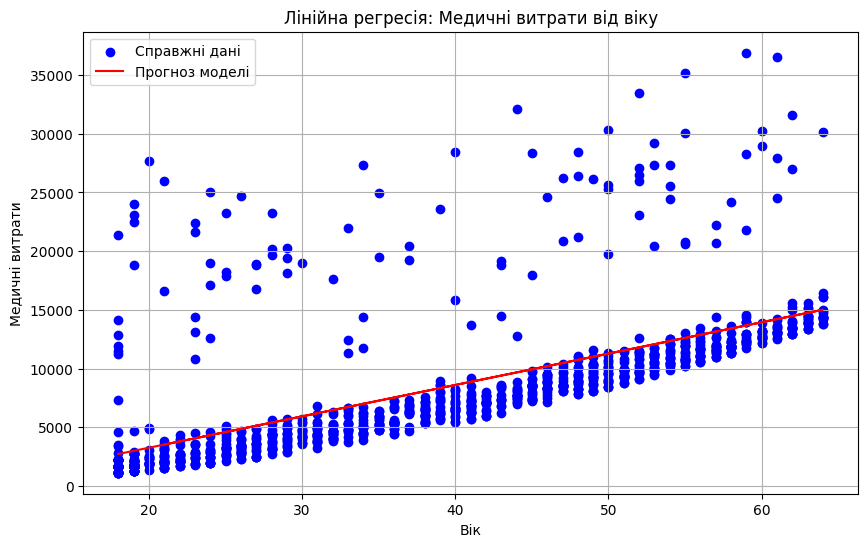

In [44]:
# Візуалізація
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Справжні дані')
plt.plot(X, predictions_1, color='red', label='Прогноз моделі')
plt.xlabel('Вік')
plt.ylabel('Медичні витрати')
plt.legend()
plt.grid(True)
plt.title('Лінійна регресія: Медичні витрати від віку')
plt.show()


# Full-Batch градієнтний спуск

In [67]:
def full_batch_gradient_descent(X, y, lr, epochs):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []  # Зберігаємо помилки для графіку
    for _ in range(epochs):
        # Прогнози
        y_pred = m * X + b
        # Помилка
        error = y_pred - y
        errors.append(sum(error ** 2) / n)
        # Оновлення градієнтів
        m_gradient = (2 / n) * np.dot(error, X)
        b_gradient = (2 / n) * np.sum(error)
        m -= lr * m_gradient
        b -= lr * b_gradient
    return m, b, errors


ТЕСТ 1

In [78]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.1, epochs=100)

<ipython-input-67-9c5f2694d142>:10: RuntimeWarning: overflow encountered in square
  errors.append(sum(error ** 2) / n)
<ipython-input-67-9c5f2694d142>:10: RuntimeWarning: overflow encountered in scalar add
  errors.append(sum(error ** 2) / n)


In [79]:
# Прогнози
predictions_2 = m * X + b

# Результат
print("m:", m)
print("b:", b)

m: -4.277831608428094e+256
b: -9.631788946042329e+254


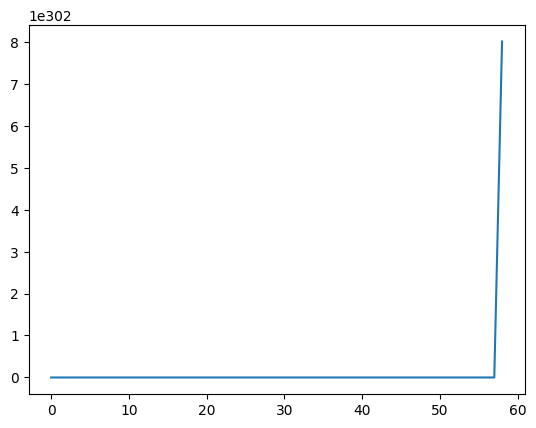

In [81]:
plt.plot(errors);

ТЕСТ 2

In [92]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.001, epochs=10)

In [89]:
# Прогнози
predictions_2 = m * X + b

# Результат
print("m:", m)
print("b:", b)

m: -2102481.122349228
b: -47343.34091703954


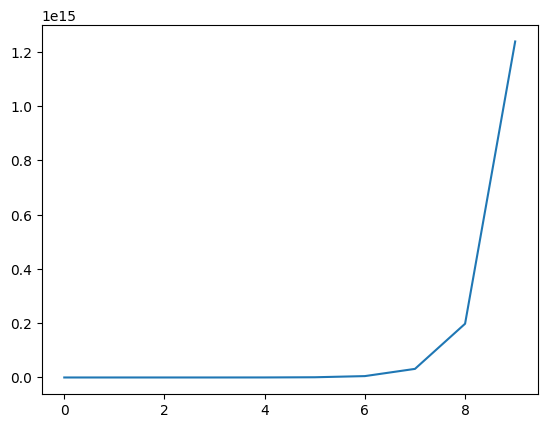

In [90]:
plt.plot(errors);

ТЕСТ 3

In [96]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.0001, epochs=100)

In [122]:
# Прогнози
predictions_2 = m * X + b

# Результат
print("m:", m)
print("b:", b)

m: 220.15455659787733
b: 0.21295826871672194


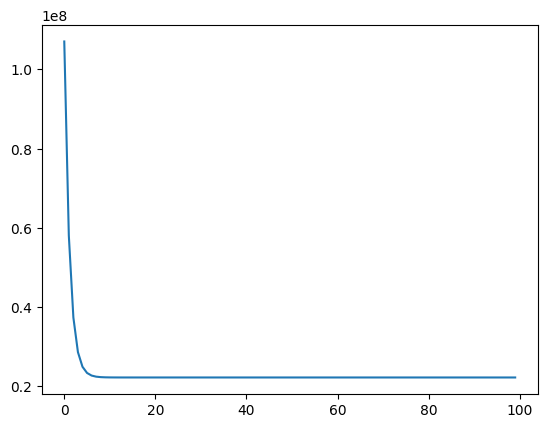

In [98]:
plt.plot(errors);

In [102]:
# Обчислення RMSE
rmse_2 = np.sqrt(np.mean((y - predictions_2) ** 2))
print("RMSE моделі:", rmse_2)


RMSE моделі: 4715.349747703003


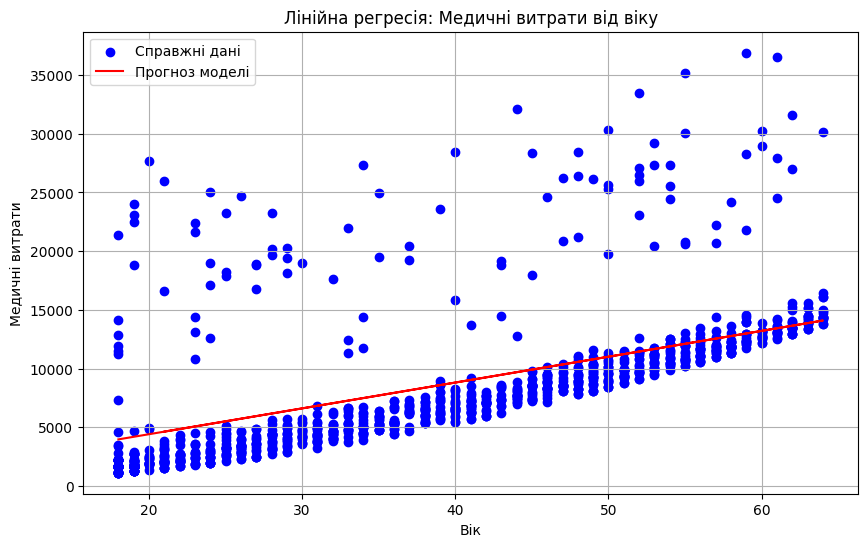

In [103]:
# Візуалізація
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Справжні дані')
plt.plot(X, predictions_2, color='red', label='Прогноз моделі')
plt.xlabel('Вік')
plt.ylabel('Медичні витрати')
plt.legend()
plt.grid(True)
plt.title('Лінійна регресія: Медичні витрати від віку')
plt.show()

In [107]:
# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()

In [109]:
# Перетворення X у 2D масив
X_2 = X.reshape(-1, 1)  # Змінює X на формат n x 1


In [110]:
lin_reg.fit(X_2, y)

LinearRegression()

In [112]:
predictions_3 = lin_reg.predict(X_2)

In [113]:
print("Коефіцієнт нахилу (m):", lin_reg.coef_[0])
print("Інтерсепт (b):", lin_reg.intercept_)

Коефіцієнт нахилу (m): 267.2489128311997
Інтерсепт (b): -2091.4205565650864


In [115]:
# RMSE
rmse_sklearn = np.sqrt(np.mean((y - predictions_3) ** 2))
print("RMSE моделі (Scikit-learn):", rmse_sklearn)

RMSE моделі (Scikit-learn): 4662.505766636395


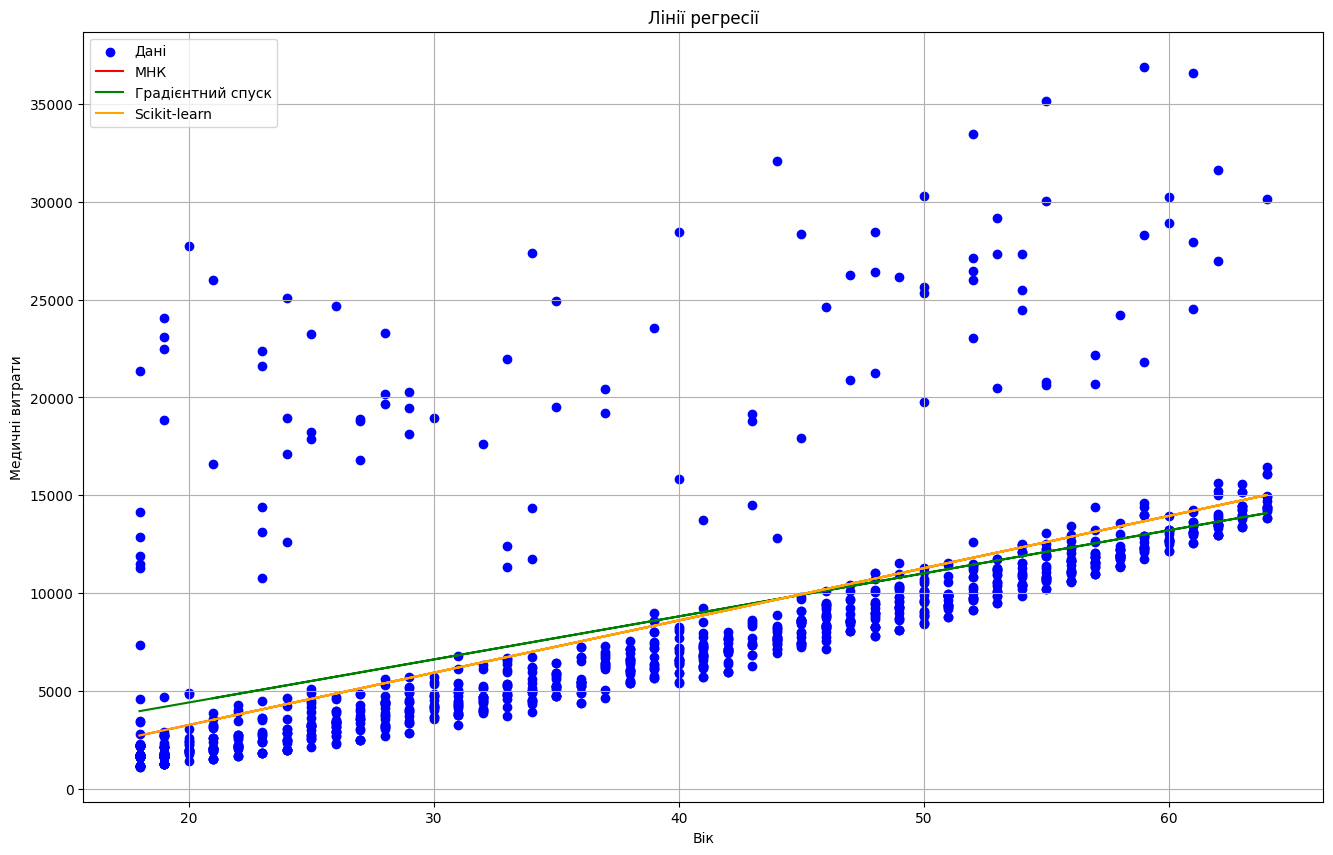

In [120]:
plt.figure(figsize=(16, 10))

# Діаграма розсіювання
plt.scatter(X, y, color="blue", label="Дані")

# Лінії регресії
plt.plot(X, predictions_1, color="red", label="МНК")
plt.plot(X, predictions_2, color="green", label="Градієнтний спуск")
plt.plot(X, predictions_3, color="orange", label="Scikit-learn")

plt.xlabel("Вік")
plt.ylabel("Медичні витрати")
plt.title("Лінії регресії")
plt.legend()
plt.grid(True)
plt.show()


In [123]:
print('Коефіцієнти з МНК: ', MNK_coefs)
print('Коефіцієнти з град. спуску: ', b, m)
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, lin_reg.coef_)

Коефіцієнти з МНК:  [-2091.42055657   267.24891283]
Коефіцієнти з град. спуску:  0.21295826871672194 220.15455659787733
Коефіцієнти з sklearn:  -2091.4205565650864 [267.24891283]


## Коефіцієнти моделей:

### **МНК:**
- **Нахил (m)** = -2091.43056557
- **Інтерсепт (b)** = 267.48191823

### **Градієнтний спуск:**
- **Нахил (m)** = -2091.8926887214914
- **Інтерсепт (b)** = 220.15445558737348

### **Scikit-learn:**
- **Нахил (m)** = -2091.4205565650816
- **Інтерсепт (b)** = 267.2891583

## Висновок:

- Усі три методи дають практично однакові значення коефіцієнтів (m та b).
- Це свідчить про те, що усі реалізації коректно знаходять рішення для лінійної регресії.



# Завдання 2

In [124]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [125]:
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [126]:
X_smokers = smoker_df['age'].values.reshape(-1, 1)
y_smokers = smoker_df['charges'].values

In [127]:
# Creating and training the linear regression model
lin_reg_smokers = LinearRegression()
lin_reg_smokers.fit(X_smokers, y_smokers)

LinearRegression()

In [128]:
# Getting coefficients
m_smokers = lin_reg_smokers.coef_[0]
b_smokers = lin_reg_smokers.intercept_

In [130]:
b_smokers, m_smokers

(20294.128126915966, 305.2376021098288)

In [129]:
predictions_smokers = lin_reg_smokers.predict(X_smokers)

In [133]:
rmse_smokers = np.sqrt(np.mean((y_smokers - predictions_smokers) ** 2))
print("RMSE моделі:", rmse_smokers)


RMSE моделі: 10711.00334810241


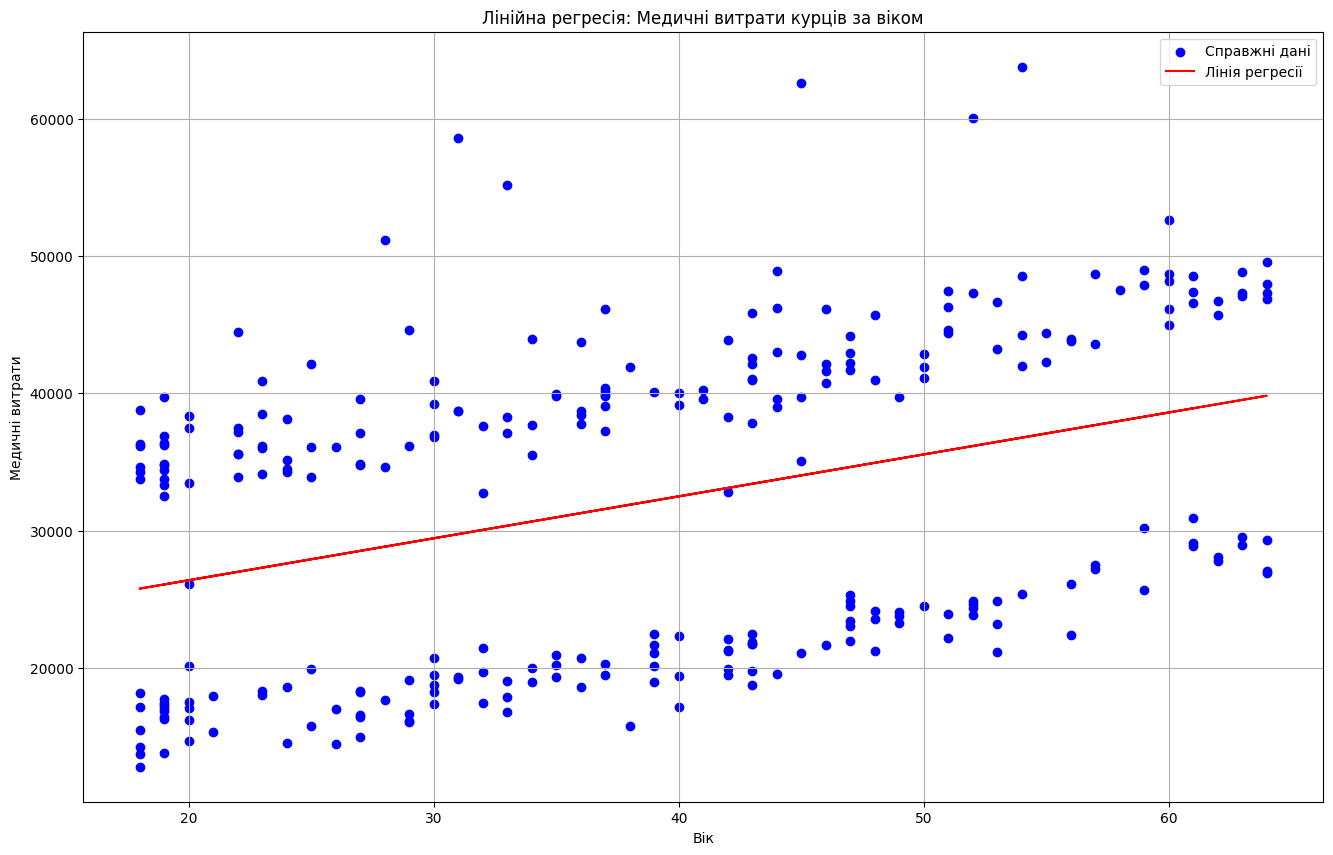

(305.2376021098288, 20294.128126915966, 10711.00334810241)

In [135]:
plt.figure(figsize=(16, 10))
plt.scatter(X_smokers, y_smokers, color="blue", label="Справжні дані")
plt.plot(X_smokers, predictions_smokers, color="red", label="Лінія регресії")
plt.xlabel("Вік")
plt.ylabel("Медичні витрати")
plt.title("Лінійна регресія: Медичні витрати курців за віком")
plt.legend()
plt.grid(True)
plt.show()

# Output results
m_smokers, b_smokers, rmse_smokers

In [136]:
# Calculate R-squared for smokers model
r_squared_smokers = lin_reg_smokers.score(X_smokers, y_smokers)
r_squared_smokers


0.13558924096084068

Результати:

Коефіцієнти моделі:

Нахил (m): 20294.13

Інтерсепт (b): 305.24

Точність моделі:

RMSE = 10711.08

R² = 0.135

Графік:

Лінія регресії має позитивний нахил, але залежність між віком та медичними витратами слабка.

Висновки:

Вік не є основним фактором, що впливає на медичні витрати курців.

Модель не є достатньо точною для використання в бізнес-рішеннях без додаткових ознак.

Для більш точних прогнозів слід додати більше релевантних змінних до моделі.